# Gravitational Orbits Final Notebook

### Author: Ian Osborne, Class: Theoretical Mechanics 5300, Professor: Dick Furnstahl, Made: 4/26/2020

Purpose: A) Numerically solve the motion of two gravitational bodies in 2D Cartesian coordinates. 
         B) Show the limiting behavior as one body becomes much more massive than the other

In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt
#import necessary libraries

In [83]:
class two_body():
    """
    two_body numerically solves the equation of motion for two gravitationally attracting bodies
    
    G: gravitational constant
    m1: mass on the joint of the first and second pendulum
    m2: mass at the end of the second pendulum arm
        
    
    """
    def __init__(self, m1=1, m2=1., G=1.
                ):
        self.G = G
        self.m1 = m1
        self.m2 = m2     
        
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [d x_1/dt  d^2 x_1/dt^2  d y_1/dt  d^2 y_1/dt^2  d x_2/dt  d^2 x_2/dt^2  d y_2/dt  d^2 y_2/dt^2]
    
        t : time 
        y : An 8-component vector with y[0] = x_1(t), y[1] = dx_1/dt  y[2] = y_1(t), y[3] = dy_1/dt 
                                       y[4] = x_2(t), y[5] = dx_2/dt  y[6] = y_2(t), y[7] = dy_2/dt
        
        """
        return [y[1],
        self.G*self.m2 * (y[4] - y[0])/((y[0]-y[4])**2 + (y[2]-y[6])**2)**(3/2), 
        y[3],
        self.G*self.m2 * (y[6] - y[2])/((y[0]-y[4])**2 + (y[2]-y[6])**2)**(3/2), 
        y[5],
        self.G*self.m1 * (y[0] - y[4])/((y[0]-y[4])**2 + (y[2]-y[6])**2)**(3/2),
        y[7],
        self.G*self.m1 * (y[2] - y[6])/((y[0]-y[4])**2 + (y[2]-y[6])**2)**(3/2)]
    
    
    
    def solve_ode(self, t_pts, x_1_init, x_dot_1_init, y_1_init, y_dot_1_init, 
                   x_2_init, x_dot_2_init, y_2_init, y_dot_2_init, abserr=1.0e-9, relerr=1.0e-9):
        """
       Solve for the Cartesian time evolutin of the system
        """
        y = [x_1_init, x_dot_1_init, y_1_init, y_dot_1_init, 
             x_2_init, x_dot_2_init, y_2_init, y_dot_2_init] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        x_1, x_dot_1, y_1, y_dot_1, x_2, x_dot_2, y_2, y_dot_2 = solution.y

        return x_1, y_1, x_2, y_2

In [84]:
#initialize two_body object
m1 = 1
m2 = 2000
G = 1

x1 = two_body(m1, m2, G)

#generate t points
t_start = 0
t_end = 10
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

In [85]:
#set initial conditions such that m2 is very large and not moving and at the origin
x_1_init = 5
x_dot_1_init = 0
y_1_init = 0
y_dot_1_init = -25
x_2_init = 0
x_dot_2_init = 0
y_2_init = 0
y_dot_2_init = 0

#use class function to solve for x_1, y_1, x_2, y_2

x_1, y_1, x_2, y_2 = x1.solve_ode(t_pts,  x_1_init, x_dot_1_init, y_1_init, y_dot_1_init, 
                   x_2_init, x_dot_2_init, y_2_init, y_dot_2_init,1.0e-9, 1.0e-9)

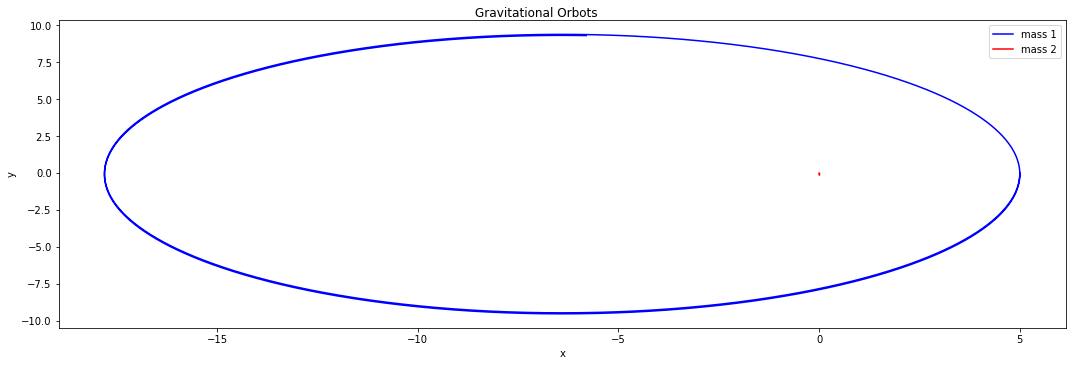

In [86]:
#plot x_1, y_1 as a function of time
fig = plt.figure(figsize=(15,5))
overall_title = 'Gravitational Orbots'
fig.suptitle(overall_title, va='baseline')
    
# orbit of m1 around m2
ax_a = fig.add_subplot(1,1,1)                  
  
ax_a.plot(x_1, y_1, color='blue', label = 'mass 1')
ax_a.set_xlabel('x')
ax_a.set_ylabel('y')
ax_a.plot(x_2, y_2, color='red', label = 'mass 2')
ax_a.legend()


                            

fig.tight_layout()

If we were to model this as a planet-star problem where $m_2$ is an unmoving central potential, we 
would use the equation $r(\theta) = \frac{c}{1-\epsilon \cos{\theta}}$.
Here, $c = \frac{r_{0}^2v_0^2 }{Gm_2} $ and $\epsilon = 1 - c / r_0$

In [112]:
#make theoretical orbit for a star-planet system given the initial parameters
#used in the numerical solution
theta_pts = np.arange(0,2.0*np.pi, 0.0001)
c = (x_1_init**2*y_dot_1_init**2)/(G * m2)
epsilon =1 - c/x_1_init
r_pts = c / (1 - epsilon * np.cos(theta_pts))

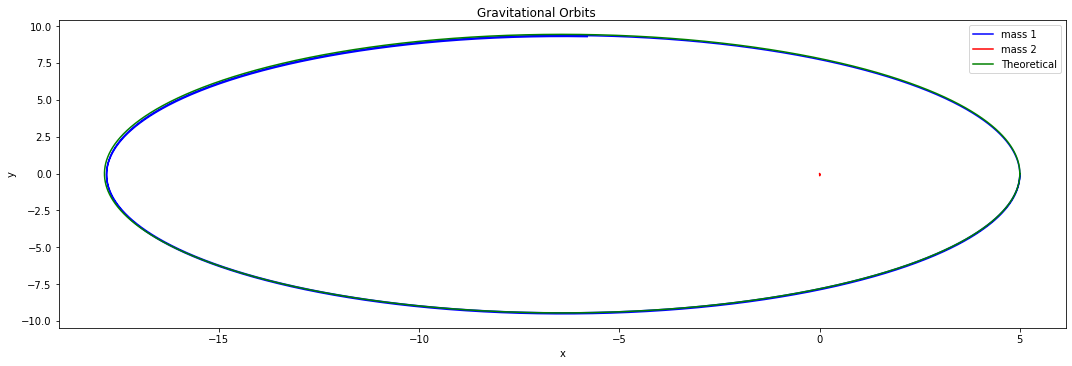

In [113]:
#plot theortical and numerical solutions on the same graph
fig = plt.figure(figsize=(15,5))
overall_title = 'Gravitational Orbits'
fig.suptitle(overall_title, va='baseline')
    
# orbit of m1 around m2
ax_a = fig.add_subplot(1,1,1)                  
  
ax_a.plot(x_1, y_1, color='blue', label = 'mass 1')
ax_a.set_xlabel('x')
ax_a.set_ylabel('y')
ax_a.plot(x_2, y_2, color='red', label = 'mass 2')
ax_a.plot(r_pts*np.cos(theta_pts), r_pts*np.sin(theta_pts), color='green', label = 'Theoretical')
ax_a.legend()


                            

fig.tight_layout()

You can barely make out the green because it is hidden by the blue, however this shows that the theoretical and numerical
solutions are the same, validating our numerical reults. 